# Set up Environment importing libraries & functions

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode

# Importing libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Plotly for interactive visualizations
init_notebook_mode(connected=True)



# Load Dataset


In [2]:
# Load Bitcoin price data from a CSV file
df =pd.read_csv(r"/Users/dejicuomu/Desktop/CV Projects/Bitcoin-Price/bitcoin_price_Training - Training.csv")


# Exploring Date

In [3]:
df.shape

(1556, 7)

In [4]:
# Display the first three rows of the dataset
df.head(5) 

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [5]:
# Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [6]:
# Descriptive statistics of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [7]:
# Display the data types of each column 
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

# Data Cleaning and Preprocessing


In [8]:
# Convert the 'Date' column to the datetime64 data type
df['Date'] = df['Date'].astype('datetime64[ns]')

In [9]:
# Checking for missing values

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64


In [10]:
# Count the number of duplicated rows in the DataFrame
df.duplicated().sum()

0

In [11]:
# Sort the DataFrame by date in ascending order
df.sort_values(by='Date', inplace=True)

# Visualizing Data

### Plotting Trends


In [12]:
# Get the column labels of the data DataFrame
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

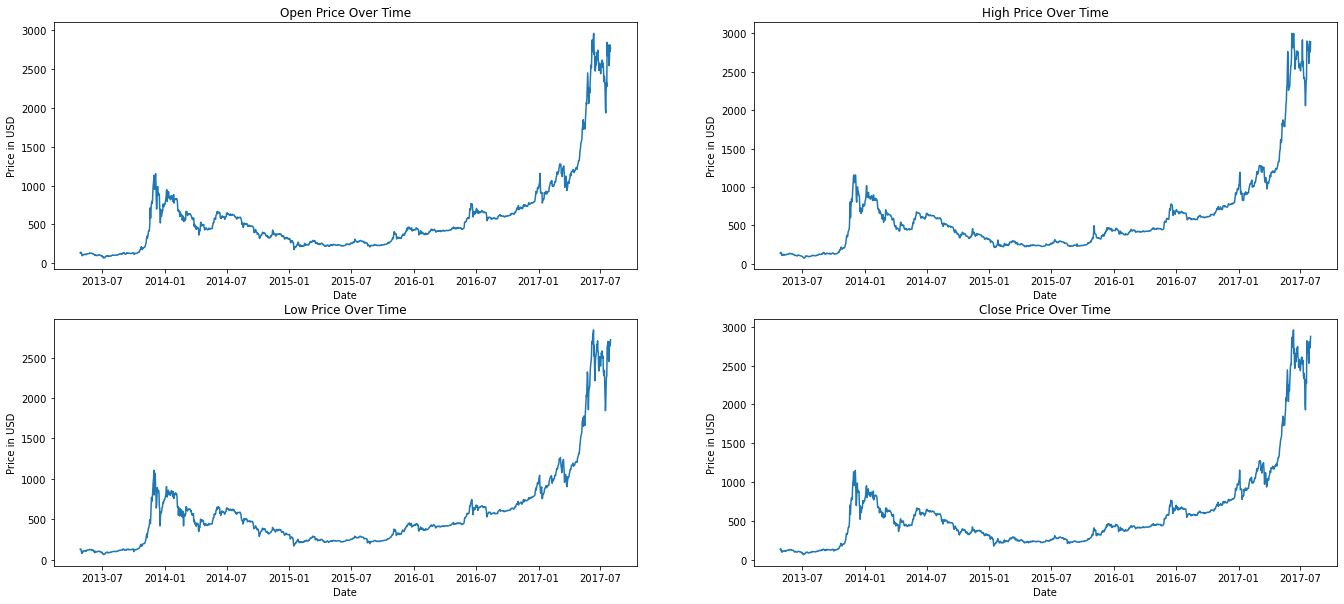

In [13]:
## Set the size of the overall figure
plt.figure(figsize=(23,10))
# Plot key columns to visualize trends over time
for index, col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2, 2, index)
    plt.plot(df['Date'], df[col])
    plt.title(f'{col} Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price in USD')

### Candlestick chart 

In [14]:
# Candlestick Chart for Financial Analysis
bitcoin_sample = df.head(50)  # Detailed view with the first 50 rows
trace = go.Candlestick(x=bitcoin_sample['Date'], open=bitcoin_sample['Open'],
                       high=bitcoin_sample['High'], low=bitcoin_sample['Low'],
                       close=bitcoin_sample['Close'])
fig = go.Figure(data=[trace])
fig.update_layout(title='Bitcoin Price Candlestick Chart', xaxis_rangeslider_visible=False)
fig.show()

### Resampling for Time Series Analysis


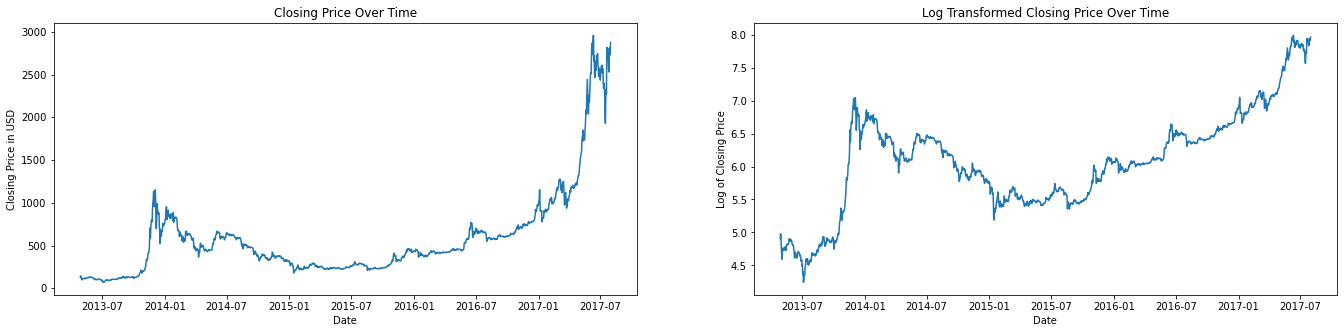

In [15]:
## Set the size of the overall figure
plt.figure(figsize=(23,5))

plt.subplot(1, 2, 1)
plt.plot(df['Date'], df['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
# This plot gives a clear view of how the closing price of Bitcoin has changed over time.

plt.subplot(1, 2, 2)
plt.plot(df['Date'], np.log1p(df['Close']))
plt.title('Log Transformed Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Log of Closing Price')
plt.show()
# Log transformation is used here to reduce the skewness of data, making trends more apparent, especially in data with wide-ranging values.



In [16]:

# Setting 'Date' as the DataFrame index for resampling
df.set_index('Date', inplace=True)


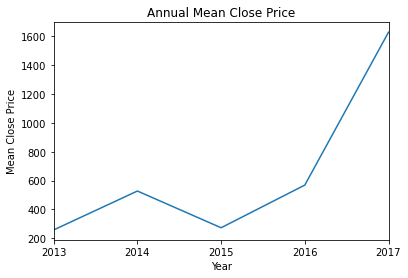

In [17]:
# Annual Resampling for Mean Close Price
df['Close'].resample('Y').mean().plot(title='Annual Mean Close Price')
plt.xlabel('Year')
plt.ylabel('Mean Close Price')
plt.show()

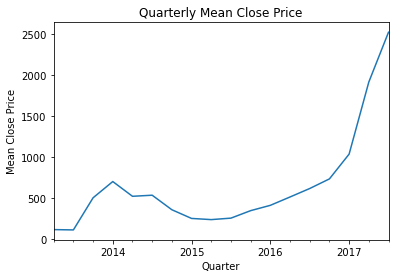

In [18]:
# Quarterly Resampling for Mean Close Price
df['Close'].resample('Q').mean().plot(title='Quarterly Mean Close Price')
plt.xlabel('Quarter')
plt.ylabel('Mean Close Price')
plt.show()

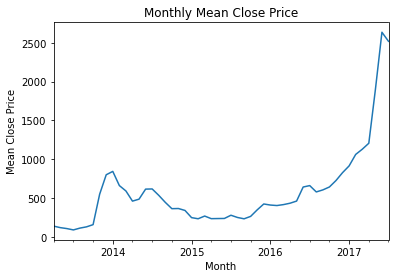

In [19]:
# Monthly Resampling for Mean Close Price
df['Close'].resample('M').mean().plot(title='Monthly Mean Close Price')
plt.xlabel('Month')
plt.ylabel('Mean Close Price')
plt.show()

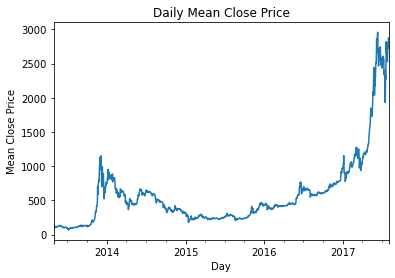

In [20]:
# Daily Resampling for Mean Close Price
df['Close'].resample('D').mean().plot(title='Daily Mean Close Price')
plt.xlabel('Day')
plt.ylabel('Mean Close Price')
plt.show()

# Machine Learning Model for Price Direction Prediction


### Random Forest Classifier

In [21]:
df['Price_Direction'] = np.where(df['Close'] > df['Open'], 1, 0)

# Prepare data for the model
X = df[['Open', 'High', 'Low', 'Close']]
y = df['Price_Direction']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [22]:
# Initialize and train the classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)
# Make predictions and evaluate the model
y_pred = rfc.predict(X_test)



### Classification report


In [23]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       135
           1       0.85      0.81      0.83       177

    accuracy                           0.81       312
   macro avg       0.80      0.81      0.81       312
weighted avg       0.81      0.81      0.81       312

Confusion Matrix:
[[109  26]
 [ 34 143]]


### Prediction & Evaluation

In [24]:
predictions = rfc.predict_proba(X_test)
print(predictions)

[[0.29 0.71]
 [0.97 0.03]
 [0.92 0.08]
 [0.07 0.93]
 [0.59 0.41]
 [0.14 0.86]
 [0.94 0.06]
 [0.94 0.06]
 [0.18 0.82]
 [0.29 0.71]
 [0.93 0.07]
 [0.54 0.46]
 [0.28 0.72]
 [0.85 0.15]
 [0.78 0.22]
 [0.03 0.97]
 [0.94 0.06]
 [0.17 0.83]
 [0.76 0.24]
 [0.76 0.24]
 [0.18 0.82]
 [0.78 0.22]
 [0.1  0.9 ]
 [0.97 0.03]
 [0.74 0.26]
 [0.22 0.78]
 [0.06 0.94]
 [0.82 0.18]
 [0.45 0.55]
 [0.97 0.03]
 [0.54 0.46]
 [0.27 0.73]
 [0.6  0.4 ]
 [0.15 0.85]
 [0.1  0.9 ]
 [0.01 0.99]
 [0.63 0.37]
 [0.5  0.5 ]
 [0.95 0.05]
 [0.79 0.21]
 [0.89 0.11]
 [0.51 0.49]
 [0.52 0.48]
 [0.11 0.89]
 [0.12 0.88]
 [0.12 0.88]
 [0.14 0.86]
 [0.19 0.81]
 [0.66 0.34]
 [0.75 0.25]
 [0.05 0.95]
 [0.52 0.48]
 [0.96 0.04]
 [0.94 0.06]
 [0.77 0.23]
 [0.17 0.83]
 [0.37 0.63]
 [0.23 0.77]
 [0.11 0.89]
 [0.06 0.94]
 [0.71 0.29]
 [0.08 0.92]
 [0.43 0.57]
 [0.98 0.02]
 [0.32 0.68]
 [0.56 0.44]
 [0.78 0.22]
 [0.09 0.91]
 [0.87 0.13]
 [0.08 0.92]
 [0.77 0.23]
 [0.1  0.9 ]
 [0.05 0.95]
 [0.21 0.79]
 [0.76 0.24]
 [0.32 0.68]
 [0.1  0.9 ]

### Confusion matrix visualization

In [25]:
print(confusion_matrix(y_test, y_pred))

[[109  26]
 [ 34 143]]


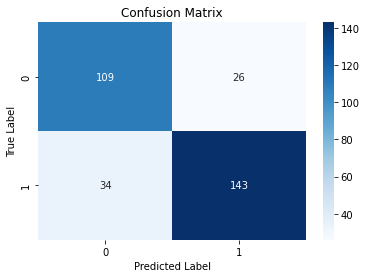

In [26]:
# Visualization: Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()